In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
data = pd.read_csv("data/training_data_ht2025.csv")
print(data.shape)
data.head()

(1600, 16)


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [14]:
data['target'] = data['increase_stock'].apply(lambda x: 1 if x == "high_bike_demand" else 0)
data = data.drop(columns=['snow'])

In [15]:
categorical_feats = ['hour_of_day', 'day_of_week', 'month', 'holiday', 
                     'weekday', 'summertime', 'increase_stock']
numerical_feats = ['temp', 'dew', 'humidity', 'precip', 'snow_depth', 
                   'windspeed', 'cloudcover', 'visibility']

In [16]:
X = data.drop(['increase_stock', 'target'], axis=1) # dropping target and helper columns
y = data['target']

In [17]:
# Split the data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (1280, 14)
Testing shape: (320, 14)


In [18]:
y_train.value_counts()

target
0    1050
1     230
Name: count, dtype: int64

In [19]:
y_test.value_counts()

target
0    262
1     58
Name: count, dtype: int64

Decision Tree Accuracy: 0.83125

Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.89      0.91      0.90       262
high_bike_demand       0.54      0.47      0.50        58

        accuracy                           0.83       320
       macro avg       0.71      0.69      0.70       320
    weighted avg       0.82      0.83      0.83       320



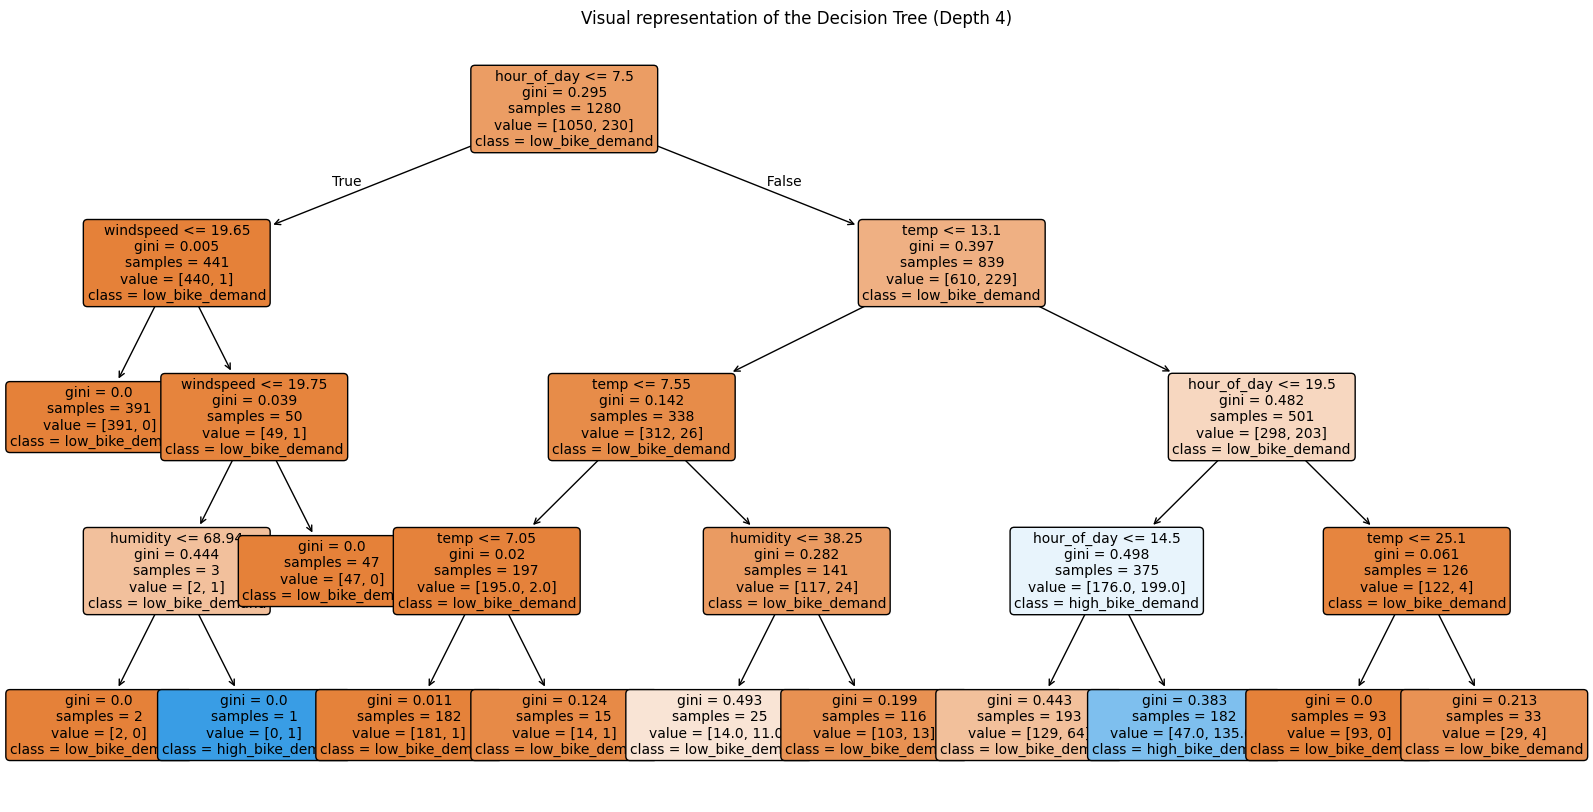

In [20]:
# Single regression tree
dt_model = DecisionTreeClassifier(random_state=23, max_depth=4) 
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=['low_bike_demand', 'high_bike_demand']))

# Visualization: Plotting the Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns,  
          class_names=['low_bike_demand', 'high_bike_demand'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Visual representation of the Decision Tree (Depth 4)")
plt.show()

Random Forest Accuracy: 0.884375

Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.91      0.95      0.93       262
high_bike_demand       0.73      0.57      0.64        58

        accuracy                           0.88       320
       macro avg       0.82      0.76      0.79       320
    weighted avg       0.88      0.88      0.88       320



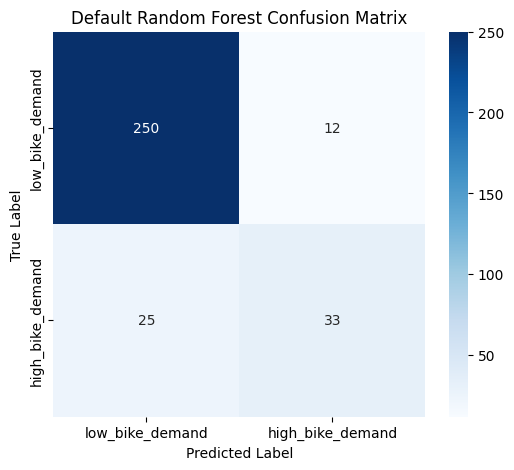

In [23]:
# Random Forest creates many trees (n_estimators=100) and averages them
rf_model = RandomForestClassifier(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['low_bike_demand', 'high_bike_demand']))

# Visualization: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['low_bike_demand', 'high_bike_demand'], yticklabels=['low_bike_demand', 'high_bike_demand'])
plt.title('Default Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

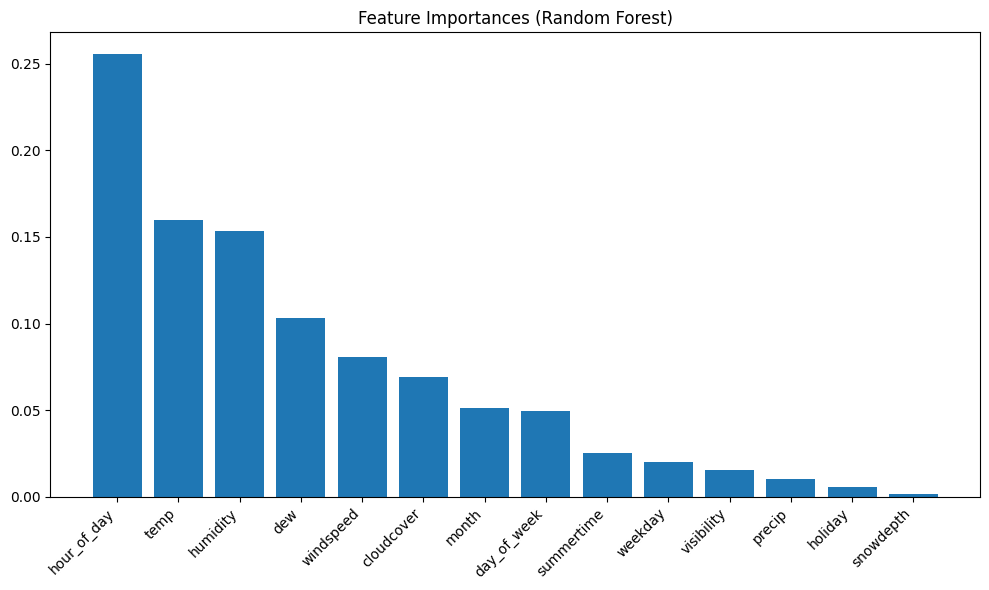

In [22]:
# Which features mattered most to the Random Forest?

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()